In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
import random

In [35]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [36]:
print(len(x), len(y))

1100 1100


In [37]:
for i in range(len(x)):
    print(x[i], y[i])

507514515 1015029042
360381017 720762046
663613800 1327227612
856495316 1712990644
454164084 908328180
240339870 480679752
786739887 1573479786
185174116 370348244
916748762 1833497536
973285342 1946570696
578012845 1156025702
698496823 1396993658
644686742 1289373496
697905403 1395810818
722112436 1444224884
627661701 1255323414
735547344 1471094700
131598783 263197578
677478290 1354956592
231633835 463267682
917442127 1834884266
936866649 1873733310
381507120 763014252
234927544 469855100
646085113 1292170238
546336697 1092673406
667319754 1334639520
36312494 72625000
551515179 1103030370
361836517 723673046
419497765 838995542
278448964 556897940
776648117 1553296246
200632877 401265766
123836764 247673540
118593179 237186370
493784505 987569022
536821981 1073643974
78509675 157019362
648764363 1297528738
573695851 1147391714
675310670 1350621352
407893839 815787690
354528390 709056792
850385477 1700770966
84709496 169419004
83477686 166955384
99630471 199260954
840663757 1681327526

In [38]:
x = np.array(x)
y = np.array(y)

In [39]:
x

array([507514515, 360381017, 663613800, ..., 164722266, 864905191,
       504794185])

In [40]:
u = x.mean()
std = x.std()

In [41]:
std

287455989.60573757

In [42]:
x = (x - u)/std

In [43]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

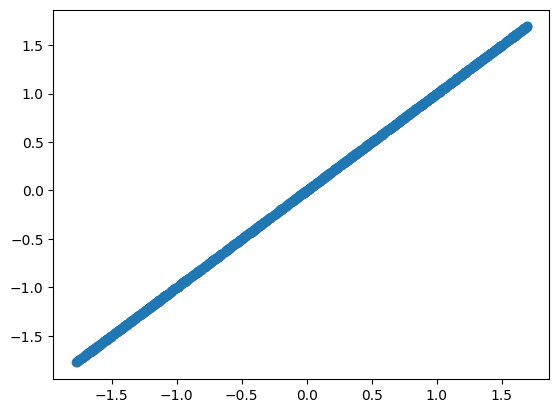

In [44]:
plt.scatter(x, y)

In [45]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) -0.010283865744457105 -0.010283865744457105


In [47]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [48]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [49]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [50]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
        
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [51]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [52]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [61]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.3)

In [62]:
theta

array([1.31807345e-16, 1.00000000e+00])

In [63]:
cost_epoch

[1.0086137041886714,
 0.490535942044486,
 0.23859332095867736,
 0.11606132226114635,
 0.05646233433194912,
 0.02747087679017172,
 0.013366843901251101,
 0.006504713543716329,
 0.0031657068284151085,
 0.0015408369873702915,
 0.0007500434825167802,
 0.0003651406507759168,
 0.0001777780633701915,
 8.656466163902027e-05,
 4.215487534472584e-05,
 2.0530518278147187e-05,
 9.999934596993434e-06,
 4.8712425420672404e-06,
 2.3731647669167153e-06,
 1.1562766649973916e-06,
 5.634320400389034e-07,
 2.7457904961239794e-07,
 1.3382569090171007e-07,
 6.523159246608283e-08,
 3.1799698248259973e-08,
 1.5503675872307606e-08,
 7.559501315204337e-09,
 3.686366505764236e-09,
 1.7978393271557845e-09,
 8.769005326862317e-10,
 4.2775684400114357e-10,
 2.0868481445491335e-10,
 1.0181975274566526e-10,
 4.968446187955169e-11,
 2.424691814263764e-11,
 1.183422812989377e-11,
 5.776579882617055e-12,
 2.8199999225649488e-12,
 1.3768127401814375e-12,
 6.722767816759988e-13,
 3.2829841398237437e-13,
 1.603381477931817

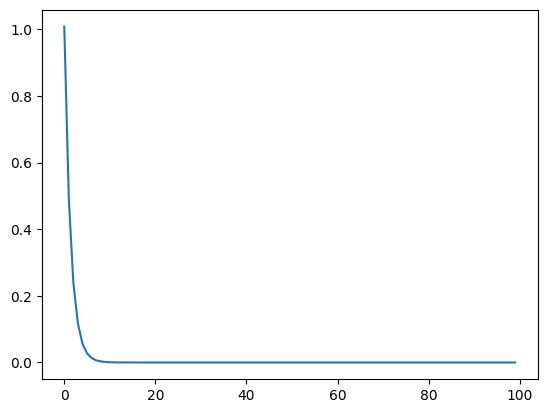

In [64]:
plt.plot(cost_epoch)

In [65]:
y_p = theta[0] + theta[1]*X_test

In [66]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

0.006775229133773812 0.006775229133773682
0.08378030399883472 0.08378030399883461
0.9314827308441308 0.9314827308441309
-1.1350580561986414 -1.1350580561986419
0.5089602147310217 0.5089602147310217
-0.48940650357468635 -0.48940650357468657
0.4412937520259713 0.4412937520259713
0.8422883604809807 0.8422883604809808
-0.05178314017725485 -0.051783140177254994
0.9472862143834049 0.947286214383405
-0.8374384688755865 -0.8374384688755868
-0.521358594789058 -0.5213585947890582
0.6270665935424875 0.6270665935424875
-0.2059987474456976 -0.2059987474456978
0.23507210717068258 0.2350721071706825
1.43780267985484 1.43780267985484
1.1981004628493583 1.1981004628493583
0.21741739763771864 0.21741739763771856
0.7967636037418753 0.7967636037418754
-1.5948313042053057 -1.5948313042053064
0.32578971592799716 0.3257897159279971
0.8686767860984255 0.8686767860984256
1.2171258552494297 1.2171258552494297
1.6724456423915082 1.6724456423915084
-1.604351589393148 -1.6043515893931486
-1.2982899306304672 -1.298

In [67]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [68]:
R2_score(Y_test, y_p)

1.0